


**Objective:**

To implement the techniques learned as a part of the course.
 

**Steps and tasks:**

1. Import the libraries, load dataset, print the shape of data, data description. (4 Marks)
2. Do Exploratory data analysis(EDA) based on the below statement. (9 Marks)
      a. Plot the distribution of all tweets among each airline & plot the distribution of sentiment across all the tweets. 
      b. Plot the distribution of Sentiment of tweets for each airline & plot the distribution of all the negative reasons. 
      c. Plot the word cloud graph of tweets for positive and negative sentiment separately.
3. Understand of data columns: (3 Marks)
     a. Drop all other columns except “text” and “airline_sentiment”.
     b. Check the shape of the data.
     c. Print the first 5 rows of data.
4. Text pre-processing: Data preparation. (12 Marks)
NOTE:- Each text pre-processing step should be mentioned in the notebook separately.
     a. Html tag removal.
     b. Tokenization.
     c. Remove the numbers.
     d. Removal of Special Characters and Punctuations.
     e. Removal of stopwords
     f. Conversion to lowercase.
     g. Lemmatize or stemming.
     h. Join the words in the list to convert back to text string in the data frame. So that each row contains the data in text format.
     i. Print the first 5 rows of data after pre-processing.
5. Vectorization: (8 Marks)
    a. Use CountVectorizer.
    b. Use TfidfVectorizer.
6. Fit, tune(optimize the parameter to improve the accuracy)& evaluate the model using both types
    of vectorization. Print the top 40 features and plot their word cloud using both types of vectorization. (14 Marks)
7. Summarize your understanding of the application of Various Pre-processing and Vectorization and
    the performance of your model on this dataset. (6 Marks)
8.Overall notebook should have:(4 Marks)
     a. Well commented code
     b. Structure and flow

**Installing emot and contractions**

In [100]:
!pip install contractions
# !pip install emoji
!pip install emot

**Importing required libraries**

In [101]:
import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt   

import seaborn as sns
# import emoji
from emot import emo_unicode
# from emot.emo_unicode import UNICODE_EMO, EMOTICONS


import wordcloud

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [102]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:
import pandas as pd
data=pd.read_csv('drive/My Drive/Tweets.csv')

In [104]:
data.shape

(14640, 15)

**Insights**
1. There are 14640 tweets with 15 columns

In [105]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,14640.0,5.692184e+17,7.791112e+14,5.675883e+17,5.685592e+17,5.694779e+17,5.698905e+17,5.703106e+17
airline_sentiment_confidence,14640.0,9.001689e-01,1.628300e-01,3.350000e-01,6.923000e-01,1.000000e+00,1.000000e+00,1.000000e+00
negativereason_confidence,10522.0,6.382983e-01,3.304398e-01,0.000000e+00,3.606000e-01,6.706000e-01,1.000000e+00,1.000000e+00
retweet_count,14640.0,8.265027e-02,7.457782e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.400000e+01


In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [107]:
data.nunique()

tweet_id                        14485
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
dtype: int64

**Insights**
1. airline sentiment has three unique value.
2. There are 14486 unique tweet - shows some duplicate tweets there.
3. Airline - 6 unique airlines

In [108]:
data.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

In [109]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### Removing Duplicates from Data

In [110]:
# Checking for duplicate tweet
data[data.duplicated(subset='tweet_id') == True]

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
12040,570308309682675712,negative,1.0000,Customer Service Issue,1.0000,American,NaN,SweeLoTmac,NaN,0,@AmericanAir why would I even consider continuing your point program when I received no perks or continued bad customer service? #senseless,NaN,2015-02-24 11:44:31 -0800,NaN,Quito
12041,570308064185880577,neutral,0.6755,NaN,0.0000,American,NaN,LancasterPattie,NaN,0,@AmericanAir we've already made other arrangements ourselves.,NaN,2015-02-24 11:43:32 -0800,NaN,NaN
12042,570307949614256128,negative,1.0000,Can't Tell,1.0000,American,NaN,ELLLORRAC,NaN,0,@AmericanAir thanks for getting back to me. But I will find other airlines in the future.,NaN,2015-02-24 11:43:05 -0800,NaN,Central Time (US & Canada)
12043,570307948171423745,negative,1.0000,Can't Tell,0.6758,American,NaN,SweeLoTmac,NaN,0,@AmericanAir why would I pay $200 to reactivate my points that are only useful for certain flights that aren't even worth $200?,NaN,2015-02-24 11:43:05 -0800,NaN,Quito
12044,570307434113310720,negative,1.0000,Late Flight,1.0000,American,NaN,LauraMolito,NaN,0,"@AmericanAir stranded for 24 hours in MIA, Patrick casimir has been the ONLY AA staff to apologize for the great inconvenience #unreal",NaN,2015-02-24 11:41:02 -0800,"New York, NY",Atlantic Time (Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,569680231012773888,negative,1.0000,Customer Service Issue,1.0000,American,NaN,LBernieMeyer,NaN,0,@AmericanAir 800 number will not even let you wait for next customer rep. Very frustrating. Can't talk to humans.,NaN,2015-02-22 18:08:45 -0800,NaN,NaN
14386,569622568459636736,negative,1.0000,Customer Service Issue,0.6398,American,NaN,SchrierCar,NaN,0,@AmericanAir I want to speak to a human being! !! This is not an obscene request!,NaN,2015-02-22 14:19:38 -0800,NaN,NaN
14392,569621879633391616,negative,1.0000,Customer Service Issue,1.0000,American,NaN,salitron78,NaN,0,@AmericanAir no response to DM or email yet. customer service?,NaN,2015-02-22 14:16:53 -0800,on @TheJR,Seoul
14543,569601363799359488,negative,1.0000,Flight Attendant Complaints,1.0000,American,NaN,stevereasnors,NaN,0,@AmericanAir should reconsider #usairways acquisition. Flight 1843 AA gold flyers insulted by attendant for hanging jacket!,NaN,2015-02-22 12:55:22 -0800,Los Angeles,Pacific Time (US & Canada)


**Insights on duplicate Tweet**
1. There are 155 duplicate tweets

Lets check one of tweet to compare two tweets.

In [111]:
# verifying twwet is really duplicate
data[data['tweet_id'] == 570308309682675712].dropna(how='all')

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
11879,570308309682675712,negative,1.0,Customer Service Issue,1.0,American,NaN,SweeLoTmac,NaN,0,@AmericanAir why would I even consider continuing your point program when I received no perks or continued bad customer service? #senseless,NaN,2015-02-24 11:44:31 -0800,NaN,Quito
12040,570308309682675712,negative,1.0,Customer Service Issue,1.0,American,NaN,SweeLoTmac,NaN,0,@AmericanAir why would I even consider continuing your point program when I received no perks or continued bad customer service? #senseless,NaN,2015-02-24 11:44:31 -0800,NaN,Quito


In [112]:
# Removing duplicate inplace 

# data_old[data_old.duplicated(keep='last') == True ] 
data.drop_duplicates(subset=['tweet_id'],inplace=True)

**Removed Duplicated tweets**

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14485 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14485 non-null  int64  
 1   airline_sentiment             14485 non-null  object 
 2   airline_sentiment_confidence  14485 non-null  float64
 3   negativereason                9082 non-null   object 
 4   negativereason_confidence     10416 non-null  float64
 5   airline                       14485 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14485 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14485 non-null  int64  
 10  text                          14485 non-null  object 
 11  tweet_coord                   1007 non-null   object 
 12  tweet_created                 14485 non-null  object 
 13  t

In [114]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,14485.0,5.692072e+17,7.756739e+14,5.675883e+17,5.685515e+17,5.694398e+17,5.698811e+17,5.703106e+17
airline_sentiment_confidence,14485.0,8.999581e-01,1.629615e-01,3.350000e-01,6.923000e-01,1.000000e+00,1.000000e+00,1.000000e+00
negativereason_confidence,10416.0,6.378744e-01,3.306359e-01,0.000000e+00,3.603750e-01,6.706000e-01,1.000000e+00,1.000000e+00
retweet_count,14485.0,8.339662e-02,7.496320e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.400000e+01


In [115]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [116]:
data.nunique()

tweet_id                        14485
airline_sentiment                   3
airline_sentiment_confidence     1018
negativereason                     10
negativereason_confidence        1403
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
dtype: int64

**Insights**

After removing duplicates there are 14485

In [117]:
for col in [ 'airline_sentiment',
       'negativereason',  'airline',
       'airline_sentiment_gold',  'negativereason_gold',
       'retweet_count', 
       'tweet_location', 'user_timezone']:
  print('='*50)
  print("%s - Unique values"%col)
  print('+'*50)
  print(data[col].unique())


airline_sentiment - Unique values
++++++++++++++++++++++++++++++++++++++++++++++++++
['neutral' 'positive' 'negative']
negativereason - Unique values
++++++++++++++++++++++++++++++++++++++++++++++++++
[nan 'Bad Flight' "Can't Tell" 'Late Flight' 'Customer Service Issue'
 'Flight Booking Problems' 'Lost Luggage' 'Flight Attendant Complaints'
 'Cancelled Flight' 'Damaged Luggage' 'longlines']
airline - Unique values
++++++++++++++++++++++++++++++++++++++++++++++++++
['Virgin America' 'United' 'Southwest' 'Delta' 'US Airways' 'American']
airline_sentiment_gold - Unique values
++++++++++++++++++++++++++++++++++++++++++++++++++
[nan 'negative' 'neutral' 'positive']
negativereason_gold - Unique values
++++++++++++++++++++++++++++++++++++++++++++++++++
[nan 'Late Flight\nFlight Attendant Complaints'
 'Late Flight\nLost Luggage' 'Late Flight' 'Customer Service Issue'
 "Can't Tell" 'Cancelled Flight\nCustomer Service Issue'
 'Cancelled Flight' 'Bad Flight' 'Lost Luggage\nDamaged Luggage'
 'Late

In [118]:
data.isnull().sum(axis=0)

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5403
negativereason_confidence        4069
airline                             0
airline_sentiment_gold          14445
name                                0
negativereason_gold             14453
retweet_count                       0
text                                0
tweet_coord                     13478
tweet_created                       0
tweet_location                   4687
user_timezone                    4775
dtype: int64

**Insights**

There are no null values in text, airline sentiment, airline. 

In [119]:
# Printing few rows of text in tweet. 
# pd.set_option('display.max_colwidth',None)/
data['text'].head()

0                                                                                               @VirginAmerica What @dhepburn said.
1                                                          @VirginAmerica plus you've added commercials to the experience... tacky.
2                                                           @VirginAmerica I didn't today... Must mean I need to take another trip!
3    @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
4                                                                           @VirginAmerica and it's a really big bad thing about it
Name: text, dtype: object

In [120]:
# plot_size = plt.rcParams["figure.figsize"]
# print(plot_size)

In [121]:
plt.rcParams['figure.figsize'] = [10,8]

### Exploratory Data Analysis

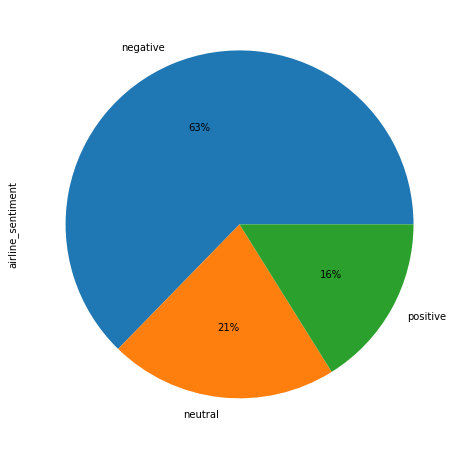

In [122]:
data.airline_sentiment.value_counts().plot(kind='pie',autopct='%1.0f%%')

**Insights**
1. 63% Negative Sentiment - Airline industry looks to have high negative sentiment amoung customer. 
2. Positive sentiment - 16% - which is least among all

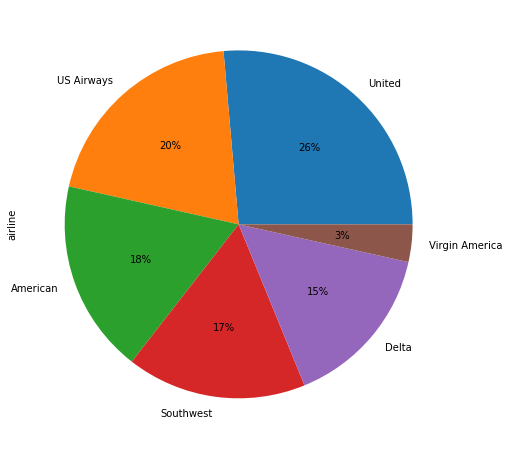

In [123]:
data.airline.value_counts().plot(kind='pie',autopct="%1.0f%%")

**Insights**
1. United (26%) has more feedback , followed by US Airways, Southwest, Delta. 
2. Virgin america looks to have least tweeet count 3%

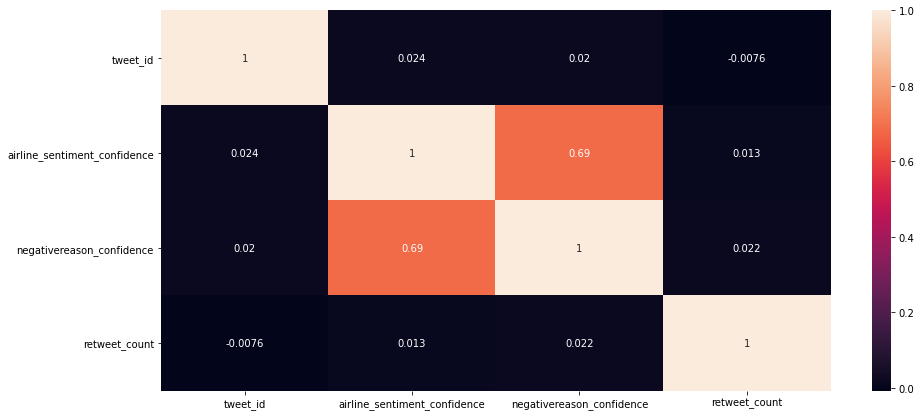

In [124]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

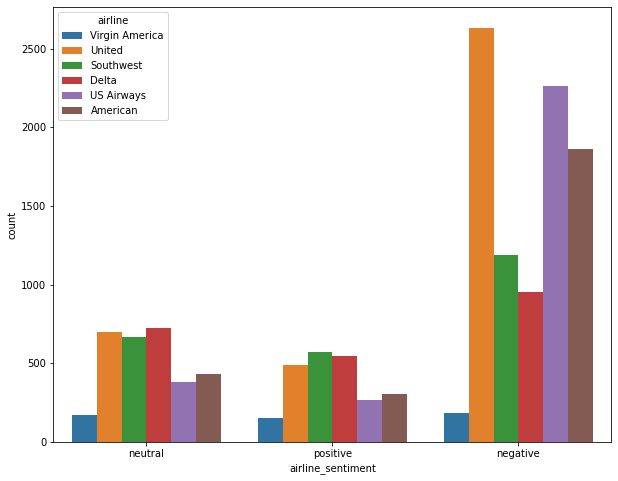

In [125]:
sns.countplot(x="airline_sentiment", hue="airline", data=data)

**Insight**

United airline has most negative tweets. 

Southwest has most positive tweets. 

Delta has most neutral tweets. 

In [126]:
data_senti = data.groupby(['airline','airline_sentiment']).airline_sentiment.count()

In [127]:
data_senti

airline         airline_sentiment
American        negative             1864
                neutral               433
                positive              307
Delta           negative              955
                neutral               723
                positive              544
Southwest       negative             1186
                neutral               664
                positive              570
US Airways      negative             2263
                neutral               381
                positive              269
United          negative             2633
                neutral               697
                positive              492
Virgin America  negative              181
                neutral               171
                positive              152
Name: airline_sentiment, dtype: int64

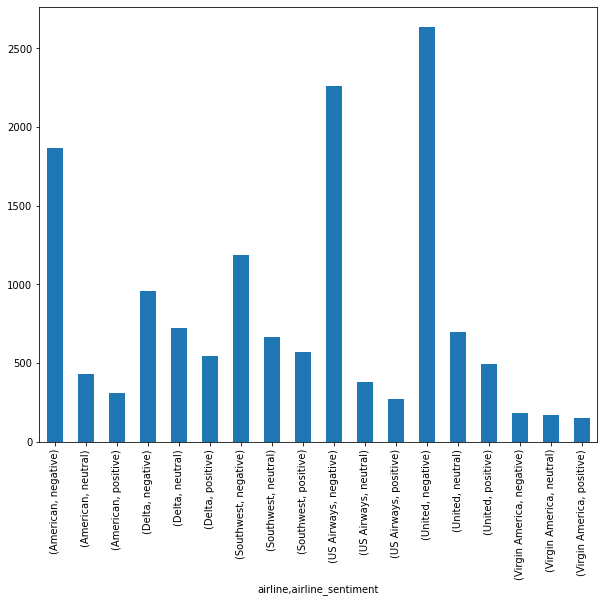

In [128]:
data_senti.plot(kind='bar')

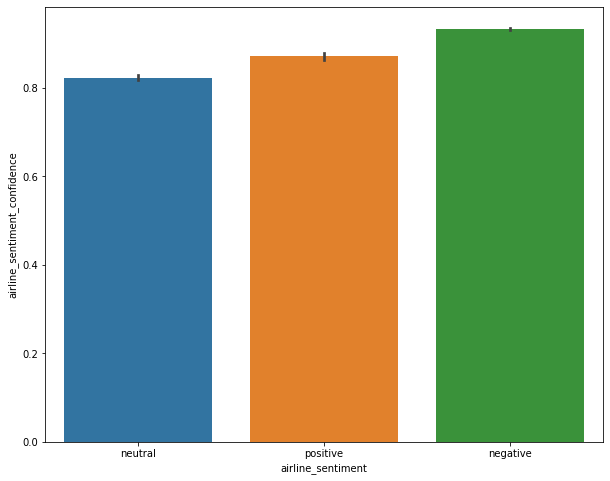

In [129]:
sns.barplot(x='airline_sentiment',y='airline_sentiment_confidence',data = data)

**Insights**
* In total negative has more number of tweets than positive and neutral.

### Understand of Data Columns

In [130]:
data_old =data.copy()

In [131]:
data.drop(columns=['tweet_id', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],inplace = True)

In [132]:
data.head(10)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it
5,negative,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA
6,positive,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)"
7,neutral,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP"
8,positive,"@virginamerica Well, I didn't…but NOW I DO! :-D"
9,positive,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me."


### **Data Pre-Processing**

**Stripping html**

In [133]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

data['text'] =data['text'].apply(lambda x: strip_html(x))

**Emoji to Text conversion**

In [134]:


# search  emoji
def is_emoji(s):
    return s in emo_unicode.UNICODE_EMOJI

def add_space(text):
    return ''.join(' ' + char if is_emoji(char) else char for char in text).strip()

def convert_emojis(text):

    text = add_space(text)
    # print(text)
    for emot in emo_unicode.UNICODE_EMOJI:
        text = text.replace(emot, "_".join(emo_unicode.UNICODE_EMOJI[emot].replace(",","").replace(":","").split()))
    return text
# Example
# text1 = "for the win as always- saved my day and got me on a direct to Orlando. 🎉🎉🎉"
# convert_emojis(text1)

In [135]:
data['text'] = data ['text'].apply(lambda x: convert_emojis(x))

**Replacing contraction**


Contractions are words or combinations of words that are shortened by dropping letters and replacing them by an apostrophe.



In [136]:
def replace_contraction(text):
  return contractions.fix(text)

data['text'] = data ['text'].apply(lambda x: replace_contraction(x))

**Removing special characters , single character, replacing multispace**

In [137]:



def preProcess_function(tweet):
# multispace to single space
  # print('+'*75)

  if r'\U' in tweet:
    print(tweet)
  # processed_tweet = 
  # print(' Original = %s'%tweet)
  processed_tweet = re.sub('\s+',' ',tweet)
  # print(processed_tweet)

  # removing a single character in beginning
  processed_tweet = re.sub(r'\^[a-zA-Z]\s+',' ',processed_tweet)
  # print(processed_tweet)
  
  # removing single character in whole text
  processed_tweet = re.sub(r'\[a-zA-Z]\s+',' ',processed_tweet)
  # print(processed_tweet)

  # Remove number
  processed_tweet = re.sub('\d+','',processed_tweet)
  # print(processed_tweet)

  # removing_link
  processed_tweet = re.sub('http[:/A-Za-z0-9.]+','',processed_tweet)
  
  # removing @twittername
  processed_tweet = re.sub(r'@\w+','',processed_tweet)
  
   # special character removal
  processed_tweet = re.sub('[\\\@.!()%&*/?+-;:"\'#]','',processed_tweet)
  # print(processed_tweet)

  

  return processed_tweet


def just_print(tweet):
  print(tweet)

In [138]:
data['text'] = data['text'].apply(lambda x: preProcess_function(x))

In [139]:
# data['text'].apply(lambda x: just_print(x))

**Tokenization**

In [140]:
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data


In [141]:

data['text']

0                                                                                                                                                    [What, said]
1                                                                                               [plus, you, have, added, commercials, to, the, experience, tacky]
2                                                                                              [I, did, not, today, Must, mean, I, need, to, take, another, trip]
3                                        [it, is, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, they, have, little, recourse]
4                                                                                                            [and, it, is, a, really, big, bad, thing, about, it]
                                                                                   ...                                                                           
14635                       

In [142]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))  

**Lemmatization**

In [143]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    # words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['text'] = data.apply(lambda row: normalize(row['text']),axis=1)
# data['Text'] = data.apply(lambda row: normalize(row['Text']), axis=1)
data['text'].head()

0                                                                            say
1                                          plus add commercials experience tacky
2                                     not today must mean need take another trip
3    really aggressive blast obnoxious entertainment guests face little recourse
4                                                           really big bad thing
Name: text, dtype: object

In [144]:
data['text']

0                                                                                              say
1                                                            plus add commercials experience tacky
2                                                       not today must mean need take another trip
3                      really aggressive blast obnoxious entertainment guests face little recourse
4                                                                             really big bad thing
                                                   ...                                            
14635                                                           thank get different flight chicago
14636    leave minutes late flight warn communication minutes late flight call shitty customer svc
14637                                                    please bring american airlines blackberry
14638                             money change flight not answer phone suggestions make commitment
14639     

In [145]:
data.columns

Index(['airline_sentiment', 'text'], dtype='object')

In [146]:
pd.set_option('display.max_colwidth', None) # Display full dataframe information (Non-turncated Text column.)

data.head(10) 

,airline_sentiment,text
0,neutral,say
1,positive,plus add commercials experience tacky
2,neutral,not today must mean need take another trip
3,negative,really aggressive blast obnoxious entertainment guests face little recourse
4,negative,really big bad thing
5,negative,seriously would pay $ flight seat not play really bad thing fly va
6,positive,yes nearly every time fly vx ear worm not go away
7,neutral,really miss prime opportunity men without hat parody
8,positive,well not...but
9,positive,amaze arrive hour early good


In [147]:
# data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data


def show_wordcloud(data, title):
    text = ' '.join(data['text'].astype(str).tolist())                 # Converting Summary column into list
    stopwords = set(wordcloud.STOPWORDS)                                  # instantiate the stopwords from wordcloud
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',          # Setting the different parameter of stopwords
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)                             
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

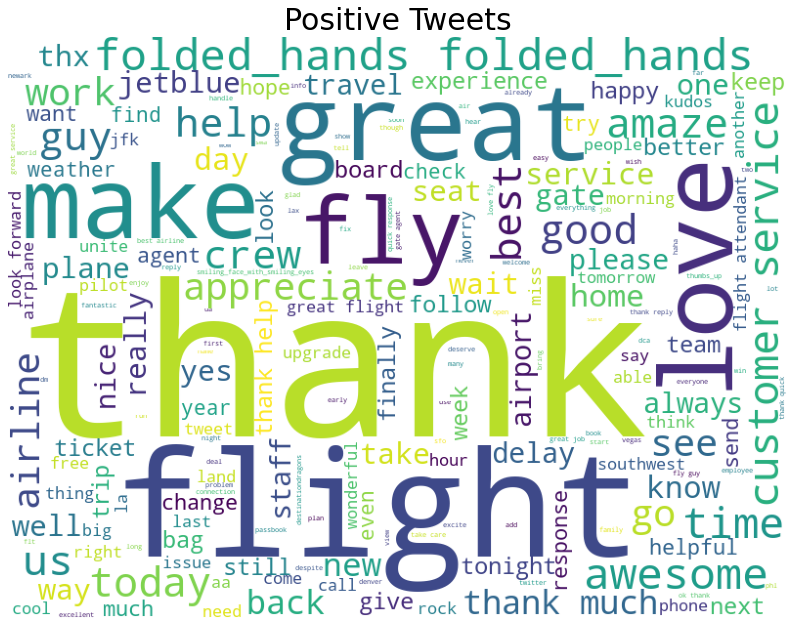

In [148]:
show_wordcloud(data[data.airline_sentiment == 'positive'], title = "Positive Tweets")

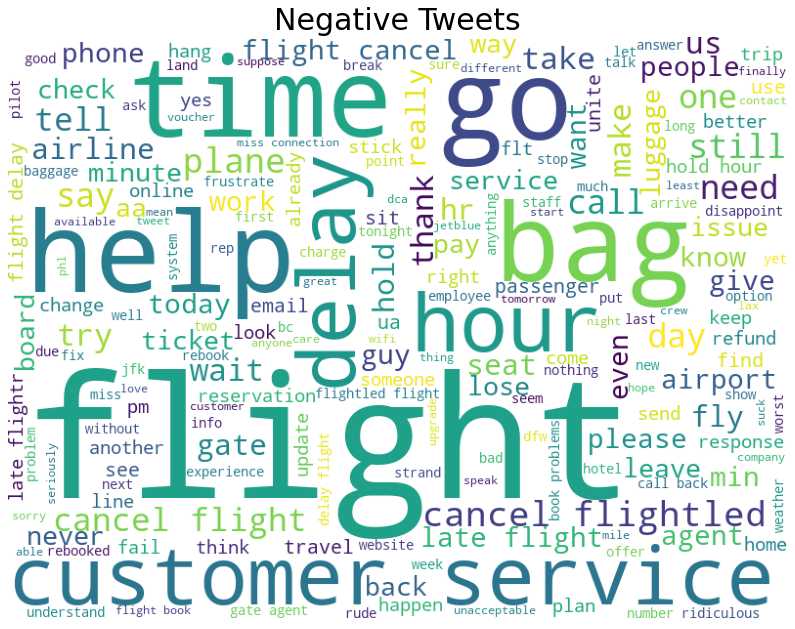

In [149]:
show_wordcloud(data[data.airline_sentiment == 'negative'], title = "Negative Tweets")

**Positive Tweet Insight**
 - Thanks, Fly , love and great - positive words in wordcloud
 

**Negative Tweet Insight**
 - help, delay,cancel,time,still - negative words are shown in wordcloud

### Count Vectorization

1. using Count vectorizer for max 2000. 
2. Spliting the test and train data. 
3. using Randforest determining minimal error and using those values. 
4. Determining Accuracy.
5. Using Word Cloud to display popular featuers

In [150]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

bow_vec = CountVectorizer(max_features=2000)                # Keep only 2000 features as number of features will increase the processing time.
data_features = bow_vec.fit_transform(data['text'])

data_features = data_features.toarray()  

In [151]:
data_features.shape

(14485, 2000)

**Converting airline sentiment to continuous**

In [152]:
data['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [153]:
sentiment_ordering = ['negative', 'neutral', 'positive']

data['airline_sentiment'] = data['airline_sentiment'].apply(lambda x: sentiment_ordering.index(x))

In [154]:
labels = data['airline_sentiment']
labels = labels.astype(int)

In [155]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=82)

**Random Forest Classfier**

In [156]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.743117324197675


**Optimizing the parameter: Number of trees in the random forest model(n_estimators)**

In [157]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]
base_ln


[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [158]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

In [159]:

# cv_scores = [0.6614056879075283,
#  0.7021413092871482,
#  0.7153565913423223,
#  0.7319267794050535,
#  0.7349835893932892,
#  0.7365618392334646,
#  0.7473126597638002,
#  0.7515531449689546,
#  0.7496802048090425,
#  0.7546112199313215,
#  0.7530326295211879,
#  0.7544132514797764,
#  0.7529345453731625,
#  0.7562869700853079,
#  0.7557940193969187,
#  0.7523431213139384,
#  0.7563866597774229,
#  0.7576686137537718,
#  0.7589501298544599,
#  0.7589515407871448,
#  0.7591479036946002,
#  0.7572740877833664,
#  0.7596412922586502,
#  0.7626003100159678]

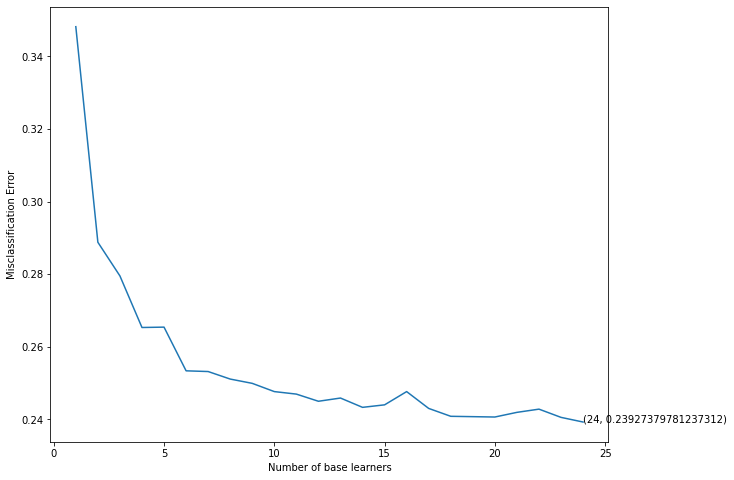

In [160]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [161]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7593189139438564

In [162]:
result =  clf.predict(X_test) 

[[2411  178   91]
 [ 402  472  105]
 [ 178   92  417]]
0.7593189139438564


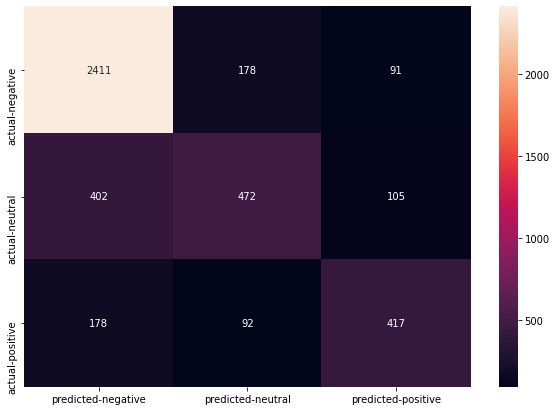

In [163]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.



conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['actual-negative','actual-neutral','actual-positive']],
                  columns = [i for i in ['predicted-negative','predicted-neutral','predicted-positive']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

**Insight of count Vectorization with Random Forest**

1. Accuracy stands to 76%
2. From Confusion matrix, 

    for Negative - TP = 2408 

    for Positive - TP = 430
    
    for Netural - TP = 465


In [164]:



print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, result)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, result, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, result, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, result, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, result, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, result, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, result, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, result, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, result, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, result, average='weighted')))

print('\nClassification Report\n')
print(classification_report(y_test, result, target_names=['Class 1', 'Class 2', 'Class 3']))



Accuracy: 0.76

Micro Precision: 0.76
Micro Recall: 0.76
Micro F1-score: 0.76

Macro Precision: 0.71
Macro Recall: 0.66
Macro F1-score: 0.68

Weighted Precision: 0.75
Weighted Recall: 0.76
Weighted F1-score: 0.75

Classification Report

              precision    recall  f1-score   support

     Class 1       0.81      0.90      0.85      2680
     Class 2       0.64      0.48      0.55       979
     Class 3       0.68      0.61      0.64       687

    accuracy                           0.76      4346
   macro avg       0.71      0.66      0.68      4346
weighted avg       0.75      0.76      0.75      4346



**Word Cloud of top 20 important features from the CountVectorizer + Random Forest based model**

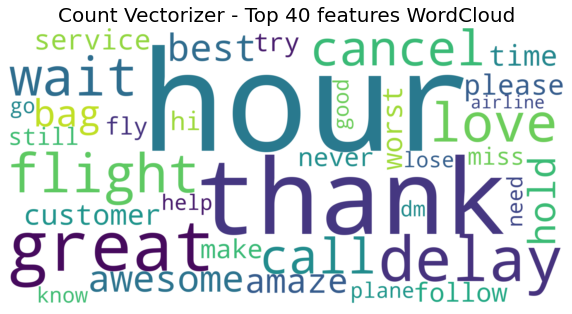

In [165]:
all_features = bow_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
    
    

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Count Vectorizer - Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

**Insights**

Top 40 Features from word cloud 

hour, thank, love great, delay, customer - mix of positive and negative sentiments 


### Term Frequency(TF) - Inverse Document Frequency(IDF)

1. using Tfidf vectorizer for prediction and applying on text before spliting. 
2. Spliting the test and train data. 
3. using Randforest determining minimal error and using those values. 
4. Determining Accuracy.
5. Using Word Cloud to display popular featuers

In [166]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2000)
data_features = vectorizer.fit_transform(data['text'])

data_features = data_features.toarray()

data_features.shape

(14485, 2000)

In [167]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=82)

In [168]:
X_test.shape

(4346, 2000)

In [169]:
X_train.shape

(10139, 2000)

In [170]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=5)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7534691059716948


In [171]:
# K - Fold Cross Validation .
tcv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    tcv_scores.append(scores.mean())

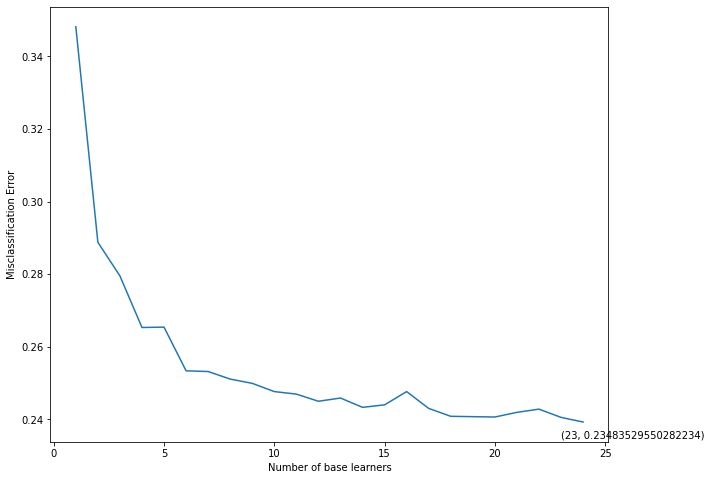

In [172]:
# plotting the error as k increases
terror = [1 - x for x in tcv_scores]                                              #error corresponds to each nu of estimator
toptimal_learners = base_ln[terror.index(min(terror))]                             #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                                        #Plot between each nu of estimator and misclassification error
xy = (toptimal_learners, min(terror))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [173]:
# Training the best model and calculating error on test data .
tclf = RandomForestClassifier(n_estimators = toptimal_learners)
tclf.fit(X_train, y_train)
tclf.score(X_test, y_test)

0.7664519098021169

In [174]:
result = tclf.predict(X_test)

[[2460  164   56]
 [ 416  470   93]
 [ 205   81  401]]
0.7664519098021169


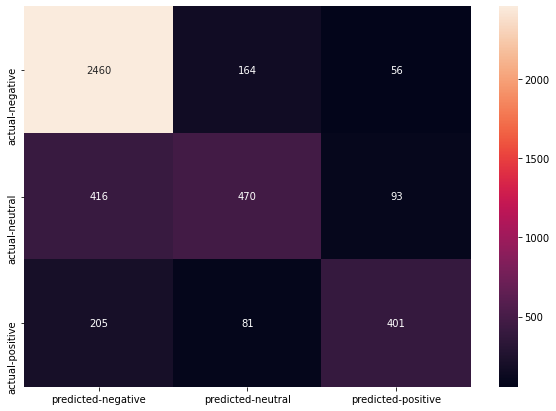

In [175]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.
result =  tclf.predict(X_test)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

tdf_cm = pd.DataFrame(conf_mat, index = [i for i in ['actual-negative','actual-neutral','actual-positive']],
                  columns = [i for i in ['predicted-negative','predicted-neutral','predicted-positive']])
plt.figure(figsize = (10,7))
sns.heatmap(tdf_cm, annot=True, fmt='g')

**Insights**

Accuracy stands at 76.80%

From Confusion Matrix, 
  
  for postive - TP - 402
  for Negative -TP - 2463
  For Neutral - TP -473

This looks better compare to Count Vectorizer 

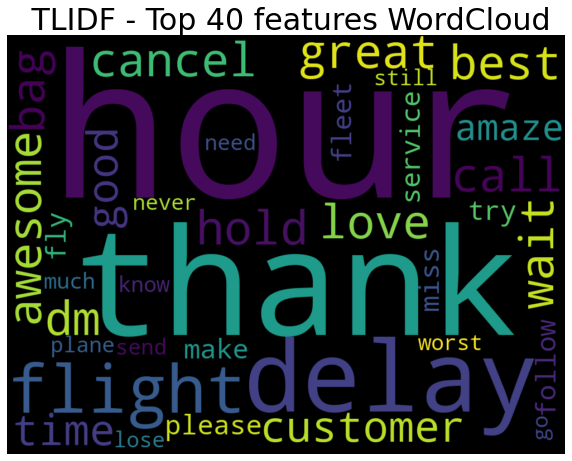

In [176]:
all_features = vectorizer.get_feature_names()                                #Instantiate the feature from the vectorizer
tTop_features=''                                                              #Addition of top 40 feature into top_feature after training the model
feat=tclf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    tTop_features+=all_features[i]
    tTop_features+=' '
    
  
from wordcloud import WordCloud
twordcloud = WordCloud(background_color="Black",width=1000, 
                          height=750).generate(tTop_features)

# Display the generated image:
plt.imshow(twordcloud, interpolation='bilinear')
plt.figure(1, figsize=(30, 30), frameon='equal')
plt.title(' TLIDF - Top 40 features WordCloud', fontsize=30)
plt.axis("off")
plt.show()

### Summary difference between count and tfidf vectorizer

In [200]:
count_vectorizer = set([ mem for mem in Top_features.split(' ') if mem != '' ])
print(count_vectorizer)

{'go', 'hold', 'flight', 'get', 'call', 'never', 'help', 'wait', 'need', 'would', 'cancel', 'best', 'customer', 'miss', 'fly', 'not', 'still', 'like', 'love', 'delay', 'hour', 'service', 'hi', 'follow', 'dm', 'hours', 'worst', 'great', 'bag', 'amaze', 'please', 'make', 'time', 'lose', 'fleet', 'appreciate', 'thank', 'awesome', 'know', 'good'}


In [201]:
tf_vectorizer = set([ mem for mem in tTop_features.split(' ') if mem != '' ])
print(tf_vectorizer)


{'go', 'hold', 'flight', 'get', 'call', 'never', 'wait', 'need', 'would', 'cancel', 'best', 'customer', 'miss', 'fly', 'not', 'still', 'love', 'delay', 'hour', 'service', 'follow', 'much', 'dm', 'hours', 'try', 'worst', 'great', 'bag', 'amaze', 'please', 'make', 'send', 'time', 'lose', 'fleet', 'plane', 'thank', 'awesome', 'know', 'good'}


{'go', 'hold', 'flight', 'get', 'call', 'never', 'wait', 'need', 'would', 'cancel', 'best', 'customer', 'miss', 'fly', 'not', 'still', 'love', 'delay', 'hour', 'service', 'follow', 'dm', 'hours', 'worst', 'great', 'bag', 'amaze', 'please', 'make', 'time', 'lose', 'fleet', 'thank', 'awesome', 'know', 'good'}
36


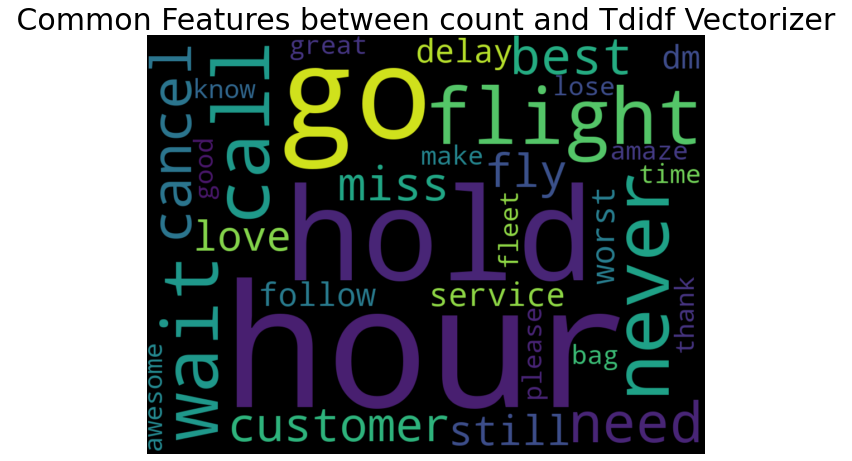

In [205]:
# common Words

common_words = count_vectorizer.intersection(tf_vectorizer)

print(common_words)
print(len(common_words))

Common_Features = ' '.join(common_words)
from wordcloud import WordCloud
twordcloud = WordCloud(background_color="Black",width=1000, 
                          height=750).generate(Common_Features)

# Display the generated image:
plt.imshow(twordcloud, interpolation='bilinear')
plt.figure(1, figsize=(30, 30), frameon='equal')
plt.title(' Common Features between count and Tdidf Vectorizer ', fontsize=30)
plt.axis("off")
plt.show()

**Insights**

1. There are 36 common features between both vectorization. 
2. Features - looks to have common positive and negative features. 

Difference in features {'help', 'like', 'hi', 'much', 'try', 'send', 'appreciate', 'plane'}


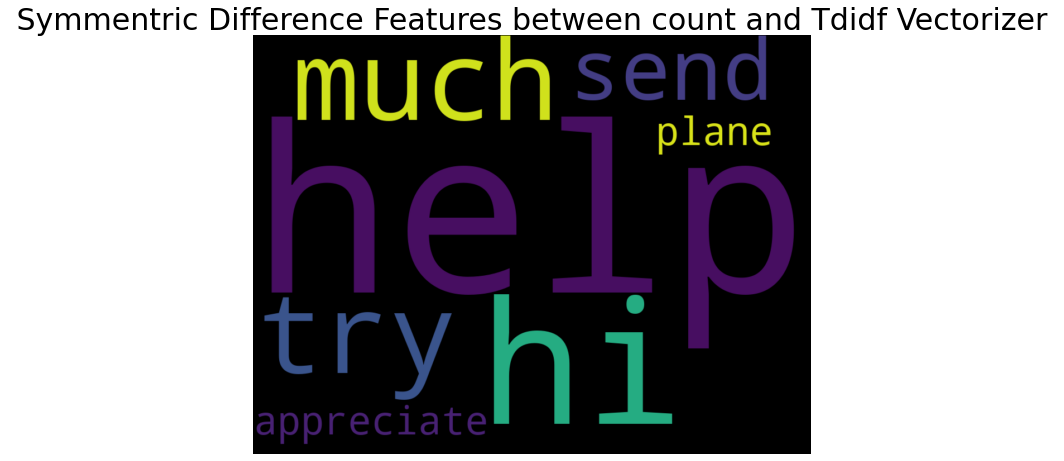

In [204]:
# Difference in feature 

difference = count_vectorizer.symmetric_difference(tf_vectorizer)
print("Difference in features %s"%difference)

difference_feature = ' '.join(difference)
from wordcloud import WordCloud
twordcloud = WordCloud(background_color="Black",width=1000, 
                          height=750).generate(difference_feature)

# Display the generated image:
plt.imshow(twordcloud, interpolation='bilinear')
plt.figure(1, figsize=(30, 30), frameon='equal')
plt.title(' Symmentric Difference Features between count and Tdidf Vectorizer ', fontsize=30)
plt.axis("off")
plt.show()


**Insights**

1. there are 8 features symmentric difference between count and tfidf. 
2. Features  - {'help', 'like', 'hi', 'much', 'try', 'send', 'appreciate', 'plane'}

### Summary



*   Tried analysing sentiments of customer from tweets whether it is positive , negative or neutral
*   Goal is to determine the sentiment from the tweets. 
*   Removed the duplicate tweets from data, removed columns not needed.
*   Used pre-processing techniques to process tweet text. 
*   Word cloud - used to display positive/negative words when sentiment is positive/negative. 
*   converted the sentiment analysis to continuos (multiclassification)


*   Used Count vectorization and TLIDF vectorizer to predict the outcome. 
*   Random Forest is used to determine the best fit. 



*   Displayed for common both count and tlidf word cloud. 
*   There are few features difference between count and tlidf - 8 feature difference.


* Finally - from model prediction - Acurracy improved little scale with TFIDF than count Vectorization. 

* We had max feature parameter to 4000. 

*   We can apply other model tuning and hyperparameter tuning techniques, as well as other pre-processing techniques to increase the overall accuracy even further.
















